## Title :
Bayes - Exercise 2

## Description :
Model $y$ as a least-squares regression as $y = \alpha + \beta \cdot x + \epsilon$ 

After completing this exercise you should see following trace plots:   

<img src="../fig/fig2.png" style="width: 500px;">


## Hints: 

<a href="https://docs.pymc.io/api/distributions/continuous.html#pymc3.distributions.continuous.Normal" target="_blank">pymc3 Normal</a>

Refer to lecture notebook.

Do not change any other code except the blanks.

In [ ]:
!pip install xarray==0.16.0 

In [1]:
import pandas as pd
import numpy as np

import pymc as pm

from matplotlib import pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('../data/data3.csv')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [alpha, beta, tau_obs]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [alpha, beta, tau_obs]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


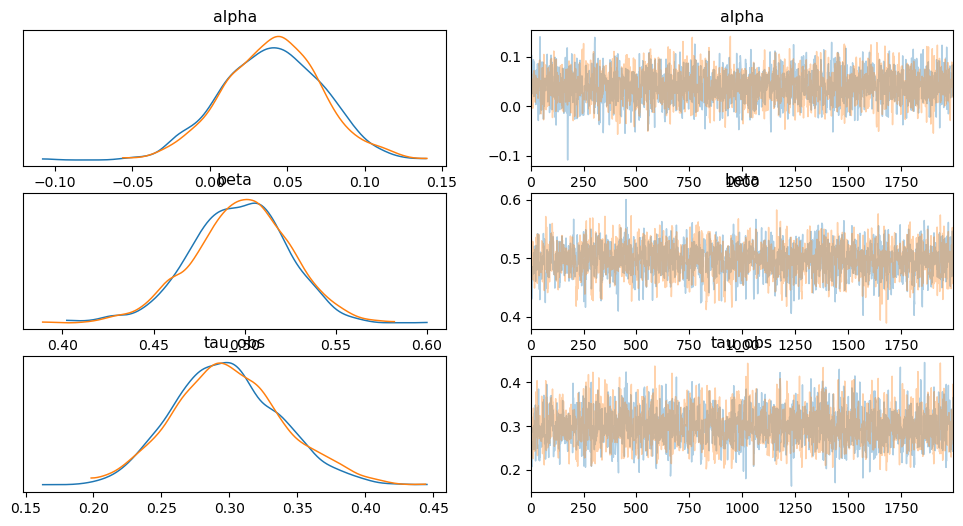

In [4]:
### edTest(test_pm_model) ###
np.random.seed(109)
with pm.Model() as model:
    # prior
    alpha = pm.Normal('alpha', mu=0, tau=1000)
    beta = pm.Normal('beta', mu=0, tau=1000)
    
    # likelihood
    # Next statement creates the expected value of mu_vec of the 
    # outcomes, specifying the linear relationship.
    # mu_vec is just the sum of the intercept alpha and the product of
    # the coefficient  beta and the predictor variable. 
    mu_vec = pm.Deterministic('mu_vec', alpha + beta * df["x"]) 
    
    tau_obs = pm.Gamma('tau_obs', 0.001, 0.001)
    obs = pm.Normal("y", mu = mu_vec, tau = tau_obs, observed=df["y"])  #Parameters to set: name, mu, tau, observed
    trace1 = pm.sample(2000, tune=2000, chains=2)
    trace2 = pm.sample(2000, tune=2000, chains=2, return_inferencedata=False)
    pm.plot_trace(trace1, var_names=['alpha','beta','tau_obs'], compact=False);


In [5]:
#posterior means
np.mean(trace2['alpha']),np.mean(trace2['beta']), np.mean(trace2['tau_obs'])

(0.04062767434934122, 0.4968272074880737, 0.2989733621876037)